In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()

In [40]:
X = iris.data
y = iris.target

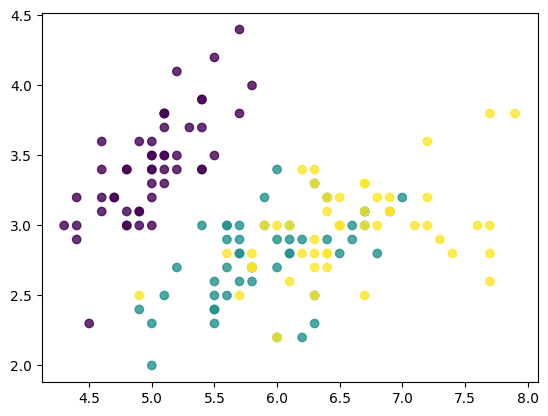

In [41]:
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.8)

# 1. Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [44]:
print('Train set', X_train.shape)
print('Test set', X_test.shape)

Train set (120, 4)
Test set (30, 4)


Text(0.5, 1.0, 'Test set')

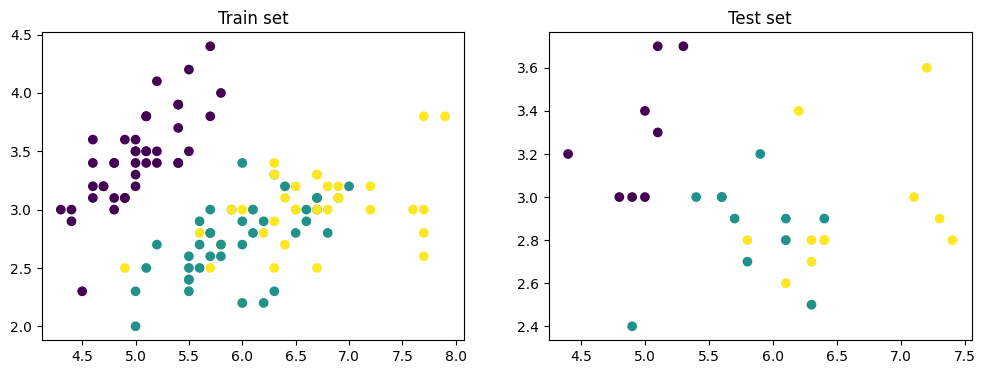

In [45]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.title('Test set')

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print('train score :',model.score(X_train ,y_train))

train score : 1.0


In [48]:
print('test score :',model.score(X_test ,y_test))

test score : 0.9


In [49]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print('test score :',model.score(X_test ,y_test))

test score : 0.9333333333333333


In [50]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print('test score :',model.score(X_test ,y_test))

test score : 0.9666666666666667


### 2 problèmes :
1. Si on utilise le test_set pour choisir le meilleur modèle, alors il ne peut plus servir à évaluer le modèle => il faut découper le train_set en 2 : train_set et validation_set, ce dernier servant à sélectionner le meilleur modèle (et les meilleurs hyper-paramètres), puis on évalue ce modèle sur le test_set
1. La sélection du modèle dépend alors du découpage train_set/validation_set, ce qui est un problème car le choix du découpage a alors un impact sur la sélection du meilleur modèle

# 2. Validation set et cross validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [53]:
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv = 5, scoring = 'accuracy').mean()

0.975

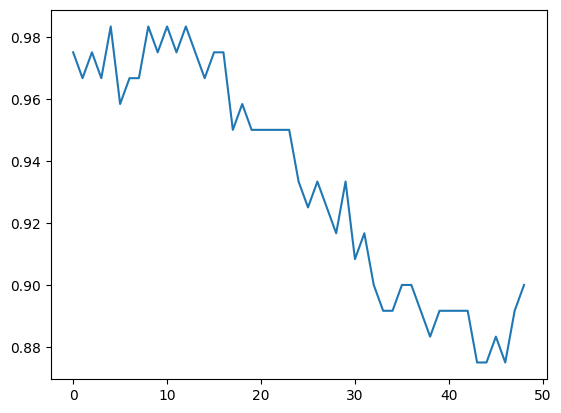

In [54]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 5).mean()
    val_score.append(score)
plt.plot(val_score)

In [55]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

# 3. Validation curve

La fonction validation_curve permet d'obtenir le même résultat sans écrire de boucle.

In [56]:
from sklearn.model_selection import validation_curve

In [57]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_scores, val_scores = validation_curve(model, X_train, y_train, param_name = "n_neighbors",param_range = k, cv = 5)

Text(0, 0.5, 'score')

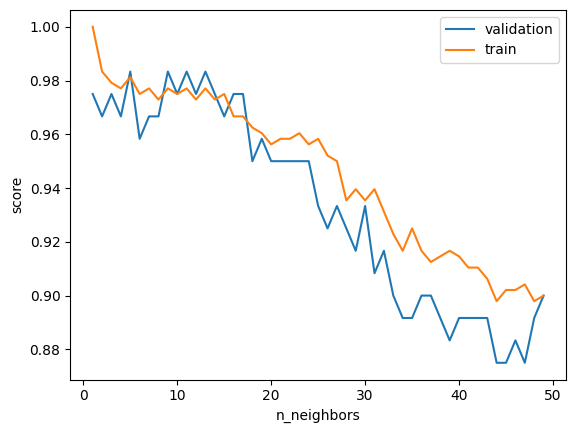

In [58]:
plt.plot(k, val_scores.mean(axis = 1), label = "validation")
plt.plot(k, train_scores.mean(axis = 1), label = "train")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("score")

L'affichage du train_score en plus du validation_score permet de détecter les cas d'over-fitting (le modèle essaye trop de coller aux données d'entraînement et n'arrive pas bien à généraliser).

# 4. Grid Search CV

Un modèle possède en général plusieurs hyper-paramètres. Afin de sélectionner les meilleures valeurs de ces hyper-paramètres, la fonction GridSearchCV permet de tous les comparer en faisant de la cross validation.

In [59]:
from sklearn.model_selection import GridSearchCV

Pour avoir la liste des hyper-paramètres que nous allons pouvoir faire varier, on peut utiliser la commande suivante :

In [60]:
print(model.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


On spécifie alors un dictionnaire contenant les hyper-paramètres choisis avec les valeurs à tester.

In [61]:
param_grid = {'n_neighbors': np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}

In [62]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [64]:
grid.best_score_

0.9833333333333334

In [65]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [66]:
model = grid.best_estimator_

In [67]:
model.score(X_test, y_test)

0.9333333333333333

# 5. Confusion matrix

La matrice de confusion permet de voir où sont les erreurs de notre modèle.

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

# 6. Learning curve

Les méthodes précédentes permettent donc de sélectionner les meilleurs hyper-paramètres d'un modèle puis de l'évaluer.

Une question importante à se poser est de savoir si nous pourrions avoir un meilleur modèle avec plus de données -> ceci peut se voir grâce à la courbe d'apprentissage.

In [70]:
from sklearn.model_selection import learning_curve

In [71]:
N, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1,1.0,10), cv = 5)

[ 9 19 28 38 48 57 67 76 86 96]


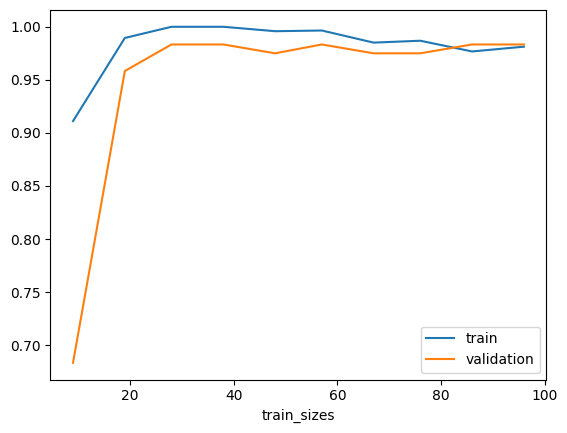

In [72]:
print(N)
plt.plot(N, train_scores.mean(axis = 1), label = 'train')
plt.plot(N, val_scores.mean(axis = 1), label = 'validation')
plt.xlabel("train_sizes")
plt.legend()

# Exercice : mettre ces techniques en oeuvre sur le dataset du Titanic

In [73]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")

In [74]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)

y = titanic.survived
X = titanic.drop('survived', axis = 1).values

<ipython-input-74-511200e9a547>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace=True)
<ipython-input-74-511200e9a547>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'].replace(['male','female'],[0,1],inplace=True)


## 1) Train Test Split

## 2) utilisation de GridSearch pour trouver les meilleurs hyperparamètres

## 3) collecter plus de données serait-il utile ?